In [1]:
from IPython.display import HTML
import numpy as np
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# Introduction

In this notebook, we will learn about Neural Networks and how to implement them using Scikit-learn. Also, we will start exploring some basic concepts for the Pytorch library.

## Table of Content

- [0. Video. Neural networks in the world around us](#0)
- [1. Deep Nueral Networks](#1)
    - [1.1 Backpropagation](#1-1)
    - [1.2 Important Concepts](#1-2)
- [2. Nueral networks in Scikit-learn](#2)
- [3. Introduction to Pytorch](#3)
    - [3.1 Tensors](#3-1)
    - [3.2 Operations](#3-2)
    - [3.3 Converting Numpy arrays and Tensors](#3-3)

<a name="0"></a>
# 0. Neural Networks in the world around us

The following video shows a nicely animated video explaining neural networks in the world around us. This video was provided by the Perth Machine Learning Group.

In [3]:
# Youtube Video
HTML(
    '<iframe width="800" height="600" src="https://www.youtube.com/embed/JxZul0fsw1k" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
)

<a name="1"></a>
# 1. Deep Neural Networks

A Neural Network is a computing system inspired by the biological neural networks that constitute animal brains. Each neuron can connect (edges) with other neurons. Those neurons and edges usually have weights that are adjusted in the training phase. The sum of the inputs is then passed to a non-linear function. The same neurons are agregated in layers into layers. Different layers will apply different transformations.

In the example below, we can observe a neural network with 3 inputs and 2 outputs. The layers in the middle are called hidden layers. The term 'Deep' from Deep Learning is given for the number of hidden layers in a neural net.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1920px-Colored_neural_network.svg.png' width=300 heigh=300/>

[Source Image](https://en.wikipedia.org/wiki/Artificial_neural_network#/media/File:Colored_neural_network.svg) License Image: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)

Example of a simple neural network with two input units (each with a single input) and one output unit (with two inputs).

<img src='https://upload.wikimedia.org/wikipedia/commons/4/42/A_simple_neural_network_with_two_input_units_and_one_output_unit.png' width=300 heigh=300/>

[Source Image](https://commons.wikimedia.org/wiki/File:A_simple_neural_network_with_two_input_units_and_one_output_unit.png) License Image: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)



The advantages of DNNs are:

- Capability to learn non-linear models.

- Capability to learn models in real-time (on-line learning) using partial_fit.

Some disadvantages of DNNs include:

- DNNs with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

- DNNs requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

- DNNs are sensitive to feature scaling.

In the upcoming notebooks, we will learn how to overcome and deal with some of those problems.

Source: [Scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips)

<a name="1-1"></a>

## 1.1 Backpropagation

The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.


    
<a name="1-2"></a>    
## 1.2 Important Concepts
    
**Optimizers:** are algorithms that updates the neural network parameters such as the weights to reduce the losses. Popular optimizers are : 
    
- `Gradient Descent`: Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient of the function at the current point.

- `Stochastic Gradient Descent`: Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient by an estimate thereof.
    
- `Adam`: an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.

Source: [Paper](https://arxiv.org/pdf/1412.6980.pdf)
    
The methods mentioned before are iterative processes that take steps to advance towards a solution. The step size at each iteration towards the minimum of loss is the **learning rate**.
    
There are visualisation of many of these optimisers here: https://github.com/3springs/viz_torch_optim

Notice that they sometimes get caught in local minima. Also not that this is a 3d space, but most backprop is in a higher dimensional space that has less change to get stuck.

<img src="https://github.com/3springs/viz_torch_optim/raw/master/docs/videos/six_humped_camel_back_20171115_09-38-57_3d.gif"/>
    
**Activation Functions:** Activation functions are important to add non-linearity into the models. This will allow the model to represent more complex data.

<img src='https://miro.medium.com/max/1400/1*ZafDv3VUm60Eh10OeJu1vw.png' width=800 heigh=800/>

Source: [Image](https://medium.com/@shrutijadon10104776/survey-on-activation-functions-for-deep-learning-9689331ba092)
    
**Regularization** is the process of adding information in order to prevent overfitting.

    
<div class="alert alert-success" style="font-size:100%">
<b>Exercise 1</b>: <br>
In the next example, you will be able to use the tensorflow playground to test some of the concepts of neural networks.
    
1. Read the concepts below
2. Explore in the iterative playground how changing some hyperparameters will affect the prediction, the number of epochs and the test loss in the output.
    - Test different values for `learning rate` and different `activations`.
    - Add different number of neurons for the hidden layers and compare results.
3. Add 6 hidden layers and perform same tests from step 2. 
4. Use the `Spiral` data, and for every hidden layer (6 in total) add 8 neurons. Compare results of the test loss with and without regularization `L1` and `L2`.
4. Add some noise and perform and repeat steps 2 to 4.
    

</div>


In [4]:
HTML(
    '<iframe src="https://playground.tensorflow.org" width="1000" height="800"></iframe>'
)

<a name="2"></a>
# 2. Neural Networks in Scikit-learn
Source: [MLP](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

> Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.


Let's try a classiffication problem with an MLP model. But first let's import the dataset.
For this example, we will be using the digits dataset which contains handwritten digits.

In [5]:
# Let's import some libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

Target: 1


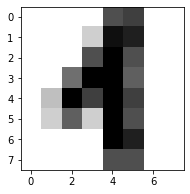

In [8]:
# Load the digits dataset
digits = datasets.load_digits()
idx = 200
# Let's first see one of the images
plt.figure(1, figsize=(3, 3))
print('Target: {}'.format(digits.target[idx]))
plt.imshow(digits.images[idx], cmap=plt.cm.gray_r)
plt.show()

In [10]:
print(digits.images[0])
print("No. Images:", len(digits.images))
print("Shape:", digits.images[0].shape)
print("Max value:", digits.images[0].max())
print("Min value:", digits.images[0].min())

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
No. Images: 1797
Shape: (8, 8)
Max value: 15.0
Min value: 0.0


In this dataset, we have a total of 1797 images of 8x8 pixels. The values ranges between 0 and 15. As mentioned before, one of the problems with NNs is that they are very sensitive to feature scaling. To solve this problem, we will scale the images in the range [0,1]

In [11]:
digits.images.shape

(1797, 8, 8)

We will use MinMaxScaler with a range of [0,1].

In [12]:
scaler = MinMaxScaler((0, 1))
scaler.fit(digits.images[0])
images = [scaler.transform(image) for image in digits.images]

Now let's check the max and min of an image to test it worked.

In [13]:
print(images[0].max())
print(images[0].min())

1.0
0.0


Now let's separate features from the target and split them between train and test data.

In [14]:
X = np.array(images)
y = digits.target

In [16]:
print(X.shape)

(1797, 8, 8)


Currently `X` has 3 dimensions. However, `MLPClassifier` only accepts arrays with 1 or 2 dimensions. We will need to reshape `X` to have only 2 dimensions.

In [17]:
# Let's flatten one dimension
X = np.resize(X, (X.shape[0], 8 * 8))
X.shape

(1797, 64)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2020
)

Now let's pick some hyperparameters before the training.

In [19]:
# Learning rate is by default 0.001, we will use the default value
def train(X_train, y_train, hidden_layers, activation):
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation=activation,
        solver=solver,
        random_state=2020,
        max_iter=100,
    ).fit(X_train, y_train)
    return clf

In [21]:
hidden_layers = 2
activation = "relu"  # ReLU Activation function
solver = "sgd"  # Stochastic Gradient Descent optimizer

# Let's train the model using our custom hyperparameters
clf = train(X_train, y_train, hidden_layers, activation)
# Let's evaluate the accuracy of the model using the test data
clf.score(X_test, y_test)

0.2833333333333333

We got an accuracy of 28.3%, which is not really great. Let's try again and train a model changing the number of hidden layers to 10.

In [23]:
hidden_layers = 10

# Let's train the model using our custom hyperparameters
clf = train(X_train, y_train, hidden_layers, activation)
# Let's evaluate the accuracy of the model using the test data
clf.score(X_test, y_test)

0.7148148148148148

With 10 hidden layers our model's accuracy improved significantly from 28.3% to 71.48%. Much better than before !

The more hidden layers a Neural Networks has, it is say that the model is "Deeper". Usually deeper models achieve better accuracy, however they are also more prompt to overfitting and regularization techniques are needed to avoid that. The interest of researchers to create models with more layers is what helped created the term "Deep Learning".

<div class="alert alert-success" style="font-size:100%">
<b>Exercise 2</b>: <br>
Create a function to test all possible combinations of the hyperparameters below and compare the accuracy to select the best hyperparameters. The process of selecting the best hyperparameters is also called hyperparameter optimisation. We will talk more about it in the coming lessons.

`Hidden Layers`: 2,4,6,8,10 <br/>
`Activation`: identity, logistic, tanh, relu <br/>
`Solver`: lbfgs, sgd, adam <br/>
</div>


You can click in the button below the reveal the solution for exercise 2

<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 2</b></font>
</summary>
    
```python
hyperparameters = {
    'hidden_layers': [2,4,6,8,10],
    'activations': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}

for solver in hyperparameters['solver']:
    for activation in hyperparameters['activations']:
        for num_hidden_layers in hyperparameters['hidden_layers']:
            print(f'Train NN with solver:{solver}, activation:{activation} and Number of hidden layers:{num_hidden_layers}')
            # Let's train the model using our custom hyperparameters
            clf = train(X_train, y_train, num_hidden_layers, activation)
            # Let's evaluate the accuracy of the model using the test data
            print('Accuracy:',clf.score(X_test, y_test))
```

</details>

<a name="3"></a>
# 3. Introduction to Pytorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR).

A number of pieces of Deep Learning software are built on top of PyTorch, including `Tesla Autopilot`, `Uber's Pyro`, `HuggingFace's Transformers`, `PyTorch Lightning`, and `Catalyst`.


According to the [Pytorch's official website](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) Pytorch is:

> It’s a Python-based scientific computing package targeted at two sets of audiences:
- A replacement for NumPy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


We will refer to the equivalent of Numpy arrays as tensors when using Pytorch.

Source: [Pytorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

<a name="3-1"></a>
## 3.1 Tensors

In [24]:
# Let's import pytorch library
import torch

# Let's create a random tensor with size [5,3]
x = torch.rand(5, 3)
print(x)

tensor([[0.5462, 0.8865, 0.7696],
        [0.5014, 0.1381, 0.8770],
        [0.1166, 0.8139, 0.0961],
        [0.2721, 0.1751, 0.3259],
        [0.6099, 0.8060, 0.8540]])


Construct a tensor directly from data:

In [25]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


Now let's creste a random tensor with the same size as the last one.

In [28]:
x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)  # result has the same size

tensor([0.3350, 0.2602])


In [29]:
print(x.size())

torch.Size([2])


<a name="3-2"></a>
## 3.2 Operations

Let's take look at the addition operation

In [30]:
x2 = torch.rand(2)
print(x, x2)

tensor([0.3350, 0.2602]) tensor([0.1107, 0.5595])


In [32]:
x2 + x

tensor([0.4458, 0.8197])

you can use a different syntax for addition:

In [33]:
print(torch.add(x, x2))

tensor([0.4458, 0.8197])


In [34]:
print(x * x2)
print(x - x2)
print(x / x2)

tensor([0.0371, 0.1456])
tensor([ 0.2243, -0.2993])
tensor([3.0254, 0.4651])


<a name="3-3"></a>
## 3.3 Converting Numpy Arrays and Tensors

First let's convert a Pytorch tensor to a numpy array

In [35]:
a = torch.ones(5)
print(a)
print(type(a))

tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>


In [37]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


See how the numpy array changed in value.

In [38]:
a.add_(1)  # In-place adding
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Now let's try to convert a numpy array to a tensor

In [39]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


So far we have learnt the basics about Neural Networks and how to implement one NN for classification using Scikit-learn.
We also introduced Pytorch and some basic operations with tensors. In the next lesson, we will dive deeper into the some important and concep

# References and further reading

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

[Pytorch](https://pytorch.org/)

[NN Playground](https://playground.tensorflow.org/)

[Multi-layered perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

[Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

[Adam](https://arxiv.org/pdf/1412.6980.pdf)

